In [240]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes 
import support_file as sf
import matplotlib.pyplot as plt
import seaborn as sns
import normalization
from sklearn.preprocessing import MinMaxScaler

Importing data

In [241]:
data_hot_clustering = sf.data_hot_clustering

data_clustering = normalization.normalized_dataframe
print(data_clustering.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
 5   State group           393 non-null    object 
dtypes: float64(5), object(1)
memory usage: 23.6+ KB
None


Turning df in numpy array, bc ktypes takes numpy array as input

In [242]:
data_array = data_num_clustering.values
print(data_array)

[[0.7514247440663249 0.6266200194046875 0.9298160975629127
  0.5731009920246083 0.6510402910728491 'MEDIUM']
 [0.36230641030445865 0.3930156526373599 0.5508007614778474
  0.35986912614108024 0.2663553422838659 'LOW']
 [0.5249528077335477 0.42637757989488656 0.5248029396502646
  0.5763962373587386 0.45372483960584226 'LOW']
 ...
 [0.47135426700224914 0.4519305392106132 0.725412331861915
  0.7047215708574093 0.5796419224342112 nan]
 [0.5736246602728934 0.5866994179540119 0.4803936698562833
  0.3106342035861042 0.39264962234715034 nan]
 [0.6331775526975603 0.590836898976984 0.30488704526211696
  0.37056019014759795 0.473831314954172 nan]]


Marking the numerical values (although already float value !! probably not neccessary)

In [243]:
data_array[:,0] = data_array[:,0].astype(float)
data_array[:,1] = data_array[:,1].astype(float)
data_array[:,2] = data_array[:,2].astype(float)
data_array[:,3] = data_array[:,3].astype(float)
data_array[:,4] = data_array[:,4].astype(float)

Choosing optimal number of cluster k

In [244]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(data_array, categorical=[5])
    cost.append(kproto.cost_)

plt.plot(cost)

ValueError: Input contains NaN

In [169]:
kproto = KPrototypes(n_clusters=3, max_iter=20)
clusters = kproto.fit_predict(data_array, categorical=[5])

In [170]:
print(kproto.cluster_centroids_)
print(clusters)

[array([[ 32.99984177,  12.01410869,  36.96408089,   3.66702104,
        505.25803401],
       [ 33.60414647,  12.7754813 ,  37.05211044,   4.5495104 ,
        606.06085227],
       [ 32.7214052 ,  11.45976492,  37.08526935,   2.61067896,
        410.04271705]]), array([['LOW'],
       ['LOW'],
       ['LOW']], dtype='<U3')]
[1 2 1 1 0 1 0 2 0 0 0 1 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 2 1 2 2 2
 0 0 2 0 1 0 1 0 0 1 0 0 2 2 0 0 2 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 2 2 0 2 0
 0 1 0 0 2 2 1 2 0 0 1 0 0 0 0 0 0 1 2 0 2 0 2 0 2 2 0 0 2 0 0 0 2 0 2 1 1
 1 0 0 0 0 1 0 0 2 2 1 2 2 0 0 0 0 0 1 0 2 1 0 2 0 0 1 0 0 0 2 2 2 1 0 1 2
 2 1 1 1 0 0 0 1 2 0 2 0 2 0 1 0 1 0 0 0 2 0 0 1 0 0 0 0 2 0 2 1 2 1 1 2 0
 2 2 0 0 1 1 1 2 1 0 2 0 1 1 0 2 0 1 1 1 1 2 1 1 0 2 0 1 0 2 0 0 1 2 0 2 1
 2 1 2 0 0 1 2 0 0 1 2 1 2 0 2 0 1 1 0 2 1 2 0 0 0 1 2 0 2 2 2 0 2 0 2 2 0
 2 0 0 1 0 1 2 0 0 1 2 2 0 0 1 0 2 1 0 2 1 2 2 0 0 1 0 2 1 0 0 2 2 2 0 0 0
 2 0 0 2 1 0 2 0 0 1 0 0 0 1 0 1 0 0 2 0 0 1 0 2 0 1 2 0 2 0 2 0 0 1 0 1 

In [171]:
cluster_list = []
for i in clusters:
    cluster_list.append(i)

Adding clusters to original dataframe 

In [172]:
data_clustering["Clusters"] = cluster_list

Analyzing cluster 0

In [182]:
data_clustering[data_clustering["Clusters"] == 0].head(10)
#data_clustering[data_clustering["Clusters"] == 0].describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State group,Clusters
4,32.021596,11.366348,36.683776,4.685017,521.572175,MEDIUM,0
6,33.992573,13.338975,37.225806,2.482608,492.606013,LOW,0
8,32.387976,13.148726,36.619957,2.494544,470.452733,MEDIUM,0
9,30.737720,12.636606,36.213763,3.357847,461.780742,LOW,0
10,32.125387,11.733862,34.894093,3.136133,457.847696,MEDIUM,0
12,32.912785,11.365492,37.607793,4.599937,534.705744,MEDIUM,0
15,32.335990,13.007819,37.851779,2.996365,486.838935,MEDIUM,0
16,33.110205,11.982045,35.293088,3.923489,529.537665,HIGH,0
17,33.105438,11.965020,37.277812,4.742578,554.722084,HIGH,0
18,33.241900,12.305418,36.163648,3.062368,497.586671,LOW,0


Analyzing cluster 1

In [174]:
data_clustering[data_clustering["Clusters"] == 1].head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State group,Clusters
0,34.497268,12.655651,39.577668,4.082621,587.951054,MEDIUM,1
2,34.305557,13.717514,36.721283,3.120179,581.852344,LOW,1
3,33.871038,12.026925,34.476878,5.493507,637.102448,HIGH,1
5,33.987773,13.386235,37.534497,3.273434,570.200409,LOW,1
11,32.617856,13.989593,37.190504,4.064549,605.061039,MEDIUM,1
13,34.507551,12.893670,37.635756,5.705154,700.917092,MEDIUM,1
27,33.792039,12.507525,37.142862,4.214495,591.197178,MEDIUM,1
29,34.564558,13.146551,37.335446,3.876875,593.915003,MEDIUM,1
30,32.726785,12.988510,36.462003,4.113226,563.672873,HIGH,1
33,33.256335,13.858062,37.780265,5.976768,725.584814,LOW,1


Analyzing cluster 2

In [175]:
data_clustering[data_clustering["Clusters"] == 2].head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State group,Clusters
1,31.926272,11.109461,37.268959,2.664034,392.204933,LOW,2
7,29.532429,10.961298,37.420216,4.046423,408.640351,HIGH,2
14,33.029332,11.765813,37.738525,2.721736,423.179992,MEDIUM,2
32,31.661050,11.398064,36.594457,3.198399,416.358354,LOW,2
34,33.900224,10.956791,37.266878,2.952669,442.667252,HIGH,2
35,34.187775,10.320116,37.453405,2.094892,384.626572,LOW,2
36,33.762069,9.984514,35.933449,3.855472,451.457447,MEDIUM,2
39,34.301870,10.568295,36.173126,3.315225,453.169502,HIGH,2
49,33.154176,11.887494,36.265001,2.602287,444.966552,HIGH,2
50,32.386252,10.674653,38.006583,3.401522,418.150081,MEDIUM,2


Visualizing clusters

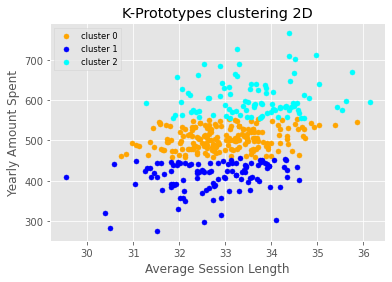

In [179]:
x = data_clustering.iloc[:,[0,4,5]].values

#print(x)

kproto = KPrototypes(n_clusters=3, max_iter=20)
clusters = kproto.fit_predict(x, categorical = [2])



plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")

#plt.scatter(kproto.cluster_centroids_[:,0], kproto.cluster_centroids_[:, 1], s = 25, c = 'black' , label = 'centroid', marker="x")
plt.xlabel("Average Session Length")
plt.ylabel("Yearly Amount Spent")
plt.title('K-Prototypes clustering 2D' )
plt.legend(fancybox=False, fontsize='small')
plt.show()